In [4]:
# installing library
!pip install tweepy pandas

# collecting tweets
import tweepy
import pandas as pd

# Replace with your bearer token
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAGrL2wEAAAAAKFqxCi3c0z1HKVW5WZE0MPUmbgk%3D5JVoZrQxMJG39eLNcolBg97GfDkATcJl3eojX9FX92ENHXasBU"

# Tweepy client setup
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Keywords/Brands
keywords = [
    "patagonia", "everlane", "reformation", "allbirds",
    '"sustainable fashion"', '"ethical clothing"', "stella mccartney"
]

query = " OR ".join(keywords) + " -is:retweet lang:en"  # no retweets, English only

# Collect tweets
tweets = client.search_recent_tweets(
    query=query,
    tweet_fields=["created_at", "text", "author_id", "lang"],
    max_results=100
)

# Save results
data = []
for tweet in tweets.data:
    data.append({
        "id": tweet.id,
        "author_id": tweet.author_id,
        "created_at": tweet.created_at,
        "text": tweet.text
    })

df = pd.DataFrame(data)
df.to_csv("sustainable_fashion_tweets.csv", index=False)
print("✅ Tweets saved to CSV!")



✅ Tweets saved to CSV!


In [7]:
# cleaning tweets
import pandas as pd
import re
import string

# Load the CSV
df = pd.read_csv("sustainable_fashion_tweets.csv")

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # remove mentions and hashtags
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # remove emojis / non-ASCII
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = text.lower().strip()
    return text

df["clean_text"] = df["text"].apply(clean_tweet)

# Save the cleaned version
df.to_csv("cleaned_fashion_tweets.csv", index=False)
print("✅ Cleaned tweets saved!")



✅ Cleaned tweets saved!


In [8]:
#  Sentiment Analysis using VADER
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df["sentiment"] = df["clean_text"].apply(get_sentiment)

# Save with sentiment labels
df.to_csv("fashion_sentiment_labeled.csv", index=False)
print(df[["clean_text", "sentiment"]].head())



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00
                                          clean_text sentiment
0                               reformation complete   Neutral
1  rt  la ensobrada florencia pe a dice que milei...   Neutral
2  rt  south africans when dealing with issues re...  Negative
3  rt  la ensobrada florencia pe a dice que milei...   Neutral
4  rt    un hombre se encontr  cara a cara con tr...   Neutral


/tmp/ipython-input-9-1035053733.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2", order=['Positive', 'Neutral', 'Negative'])


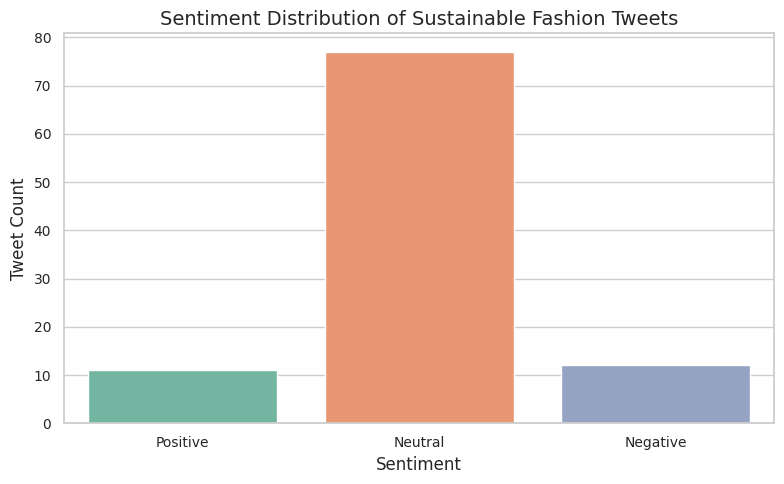

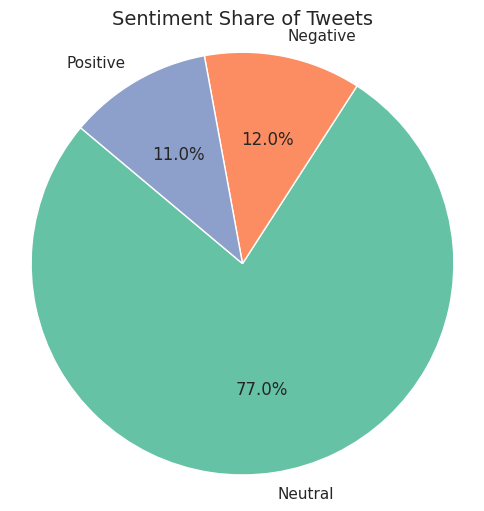

In [9]:
# Visualizing Sentiment Distribution
# install library
!pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your labeled tweet data
df = pd.read_csv("fashion_sentiment_labeled.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# Bar Chart: Sentiment Count
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=df, palette="Set2", order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution of Sustainable Fashion Tweets", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Tweet Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Pie Chart
# Pie Chart
sentiment_counts = df['sentiment'].value_counts()
colors = sns.color_palette("Set2")

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Sentiment Share of Tweets", fontsize=14)
plt.axis('equal')  # Keep it circular
plt.show()



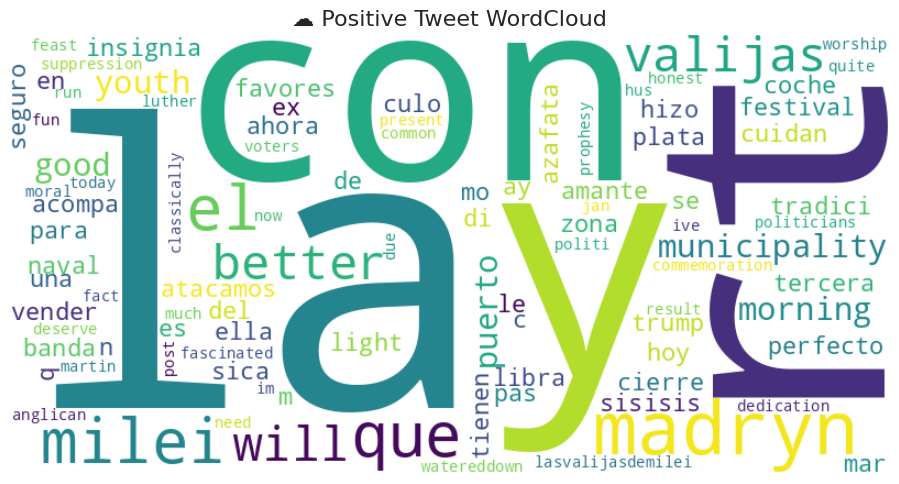

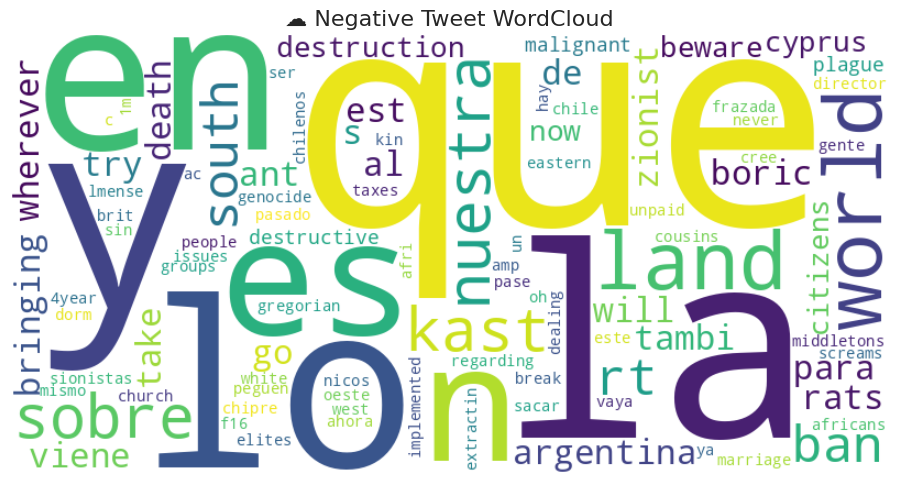

In [10]:
# Generate WordClouds for Positive and Negative Tweets
# install library
!pip install wordcloud
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load your labeled data
df = pd.read_csv("fashion_sentiment_labeled.csv")

# Optional: Add custom stopwords to ignore common words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["sustainable", "fashion", "clothing", "brand", "eco", "patagonia", "reformation", "everlane", "stella", "allbirds"])  # remove brand names and generic words

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        max_words=100
    ).generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Positive WordCloud
positive_text = df[df['sentiment'] == 'Positive']['clean_text']
generate_wordcloud(positive_text, "☁️ Positive Tweet WordCloud")

# Negative WordCloud
negative_text = df[df['sentiment'] == 'Negative']['clean_text']
generate_wordcloud(negative_text, "☁️ Negative Tweet WordCloud")


                                          clean_text        brand sentiment
0                               reformation complete  Reformation   Neutral
1  rt  la ensobrada florencia pe a dice que milei...    Patagonia   Neutral
2  rt  south africans when dealing with issues re...  Reformation  Negative
3  rt  la ensobrada florencia pe a dice que milei...    Patagonia   Neutral
4  rt    un hombre se encontr  cara a cara con tr...    Patagonia   Neutral
sentiment    Negative  Neutral  Positive
brand                                   
Allbirds            0        1         0
Other               1        3         3
Patagonia           7       70         4
Reformation         4        3         4


/tmp/ipython-input-11-604724896.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


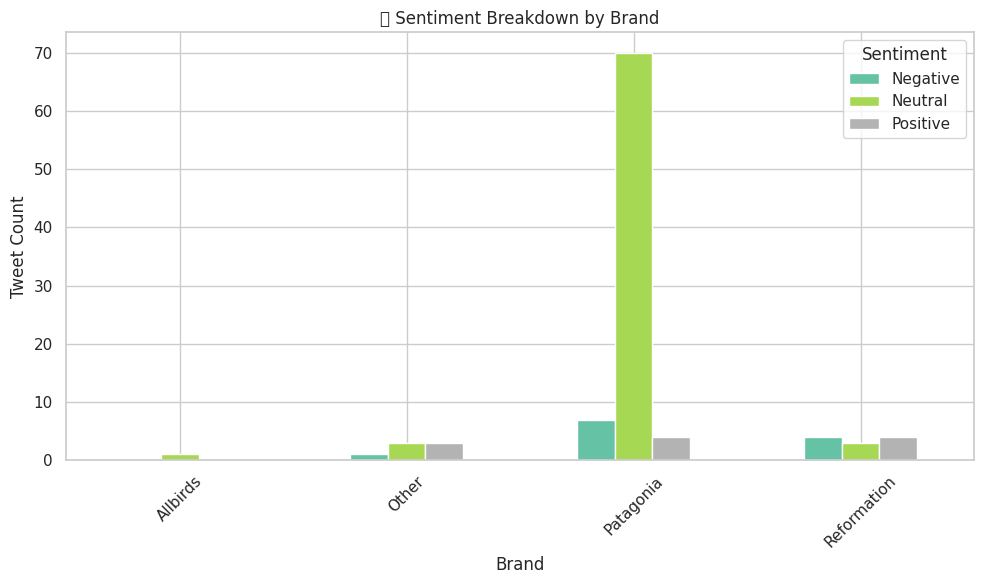

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


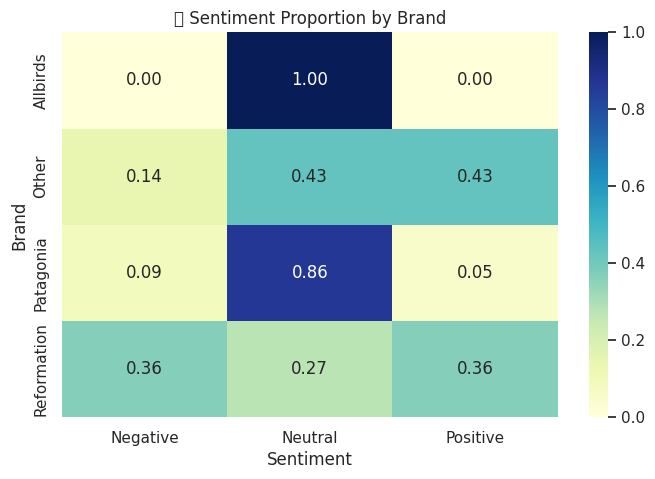

In [11]:
# Detect Brand Mentions in Each Tweet
import pandas as pd

# Load the cleaned, labeled tweets
df = pd.read_csv("fashion_sentiment_labeled.csv")

# Define brand keywords to look for
brand_keywords = {
    'patagonia': 'Patagonia',
    'everlane': 'Everlane',
    'reformation': 'Reformation',
    'allbirds': 'Allbirds',
    'stella': 'Stella McCartney',
    'mccartney': 'Stella McCartney'
}

# Function to tag brands mentioned in tweet
def detect_brand(text):
    text = text.lower()
    for keyword, brand in brand_keywords.items():
        if keyword in text:
            return brand
    return 'Other'

df['brand'] = df['clean_text'].apply(detect_brand)

# Preview
print(df[['clean_text', 'brand', 'sentiment']].head())
# Count Sentiment Per Brand
# Create a pivot table: rows = brands, columns = sentiments, values = counts
brand_sentiment = pd.crosstab(df['brand'], df['sentiment'])

# Optional: Normalize by row (percentage)
brand_sentiment_norm = brand_sentiment.div(brand_sentiment.sum(axis=1), axis=0)

print(brand_sentiment)
# Visualize as Grouped Bar Chart
import matplotlib.pyplot as plt

# Plot grouped bar chart
brand_sentiment.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("📈 Sentiment Breakdown by Brand")
plt.xlabel("Brand")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
# Heatmap of Sentiment Percentages
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(brand_sentiment_norm, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔥 Sentiment Proportion by Brand")
plt.ylabel("Brand")
plt.xlabel("Sentiment")
plt.show()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ Collected 639 Reddit posts
✅ Reddit sentiment analysis done and saved!


/tmp/ipython-input-17-2122128573.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_reddit, palette='Set3')
/tmp/ipython-input-17-2122128573.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


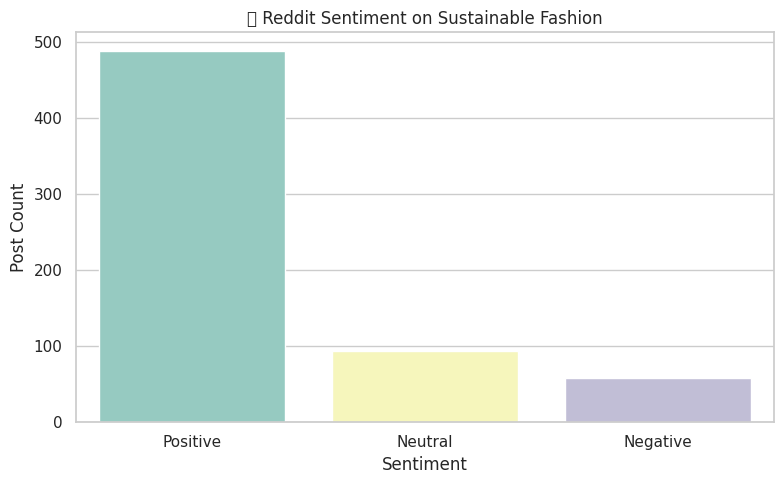

In [17]:
# REDDIT
# install libraray
!pip install praw pandas vaderSentiment
# Collect Reddit Posts
import praw
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 🔐 Replace with your Reddit app credentials
reddit = praw.Reddit(
    client_id="T5NdvX1IyYiUuezlUfNa1Q",
    client_secret="iAzYqkbXURpLlW75lmMhFBzAHqHAqQ",
    user_agent="FashionFeelingsBot"
)

# 🔍 Subreddits to search
subreddits = ['SustainableFashion', 'femalefashionadvice', 'frugalmalefashion']
keywords = ['patagonia', 'everlane', 'reformation', 'allbirds', 'stella mccartney', 'ethical clothing']

posts = []

# Loop through each subreddit
for sub in subreddits:
    subreddit = reddit.subreddit(sub)
    for keyword in keywords:
        for post in subreddit.search(keyword, limit=50):
            posts.append({
                'subreddit': sub,
                'keyword': keyword,
                'title': post.title,
                'text': post.selftext,
                'created_utc': post.created_utc
            })

df_reddit = pd.DataFrame(posts)
df_reddit['full_text'] = df_reddit['title'] + " " + df_reddit['text']
print(f"✅ Collected {len(df_reddit)} Reddit posts")
# Clean and Analyze Sentiment
import re
import string

analyzer = SentimentIntensityAnalyzer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = text.lower().strip()
    return text

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_reddit['clean_text'] = df_reddit['full_text'].apply(clean_text)
df_reddit['sentiment'] = df_reddit['clean_text'].apply(get_sentiment)

df_reddit.to_csv("reddit_fashion_sentiment.csv", index=False)
print("✅ Reddit sentiment analysis done and saved!")
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df_reddit, palette='Set3')
plt.title("📊 Reddit Sentiment on Sustainable Fashion")
plt.xlabel("Sentiment")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()



In [19]:
# Reddit vs Twitter Comparison
# Combine Twitter + Reddit for Brand-Level Sentiment Comparison
import pandas as pd

# Load both datasets
df_twitter = pd.read_csv("fashion_sentiment_labeled.csv")
df_reddit = pd.read_csv("reddit_fashion_sentiment.csv")

# Add platform column
df_twitter['platform'] = 'Twitter'
df_reddit['platform'] = 'Reddit'

# Brand Detection Setup
# Define brand keywords
brand_keywords = {
    'patagonia': 'Patagonia',
    'everlane': 'Everlane',
    'reformation': 'Reformation',
    'allbirds': 'Allbirds',
    'stella': 'Stella McCartney',
    'mccartney': 'Stella McCartney'
}

# Detect brand in tweet text
def detect_brand(text):
    text = text.lower()
    for keyword, brand in brand_keywords.items():
        if keyword in text:
            return brand
    return 'Other'

# Apply to your Twitter dataset
df_twitter['brand'] = df_twitter['clean_text'].apply(detect_brand)


# Unify column structure
df_twitter['brand'] = df_twitter['brand'].fillna("Other")
df_reddit['brand'] = df_reddit['keyword'].str.title()  # Use keyword as brand

# Keep only needed columns
combined = pd.concat([
    df_twitter[['brand', 'sentiment', 'platform']],
    df_reddit[['brand', 'sentiment', 'platform']]
])

# Group and count
grouped = combined.groupby(['brand', 'platform', 'sentiment']).size().unstack(fill_value=0).reset_index()
print(grouped.head())


sentiment             brand platform  Negative  Neutral  Positive
0                  Allbirds   Reddit         6       24        92
1                  Allbirds  Twitter         0        1         0
2          Ethical Clothing   Reddit         7        3        99
3                  Everlane   Reddit        20       28       102
4                     Other  Twitter         1        3         3


/tmp/ipython-input-20-2679888968.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-20-2679888968.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


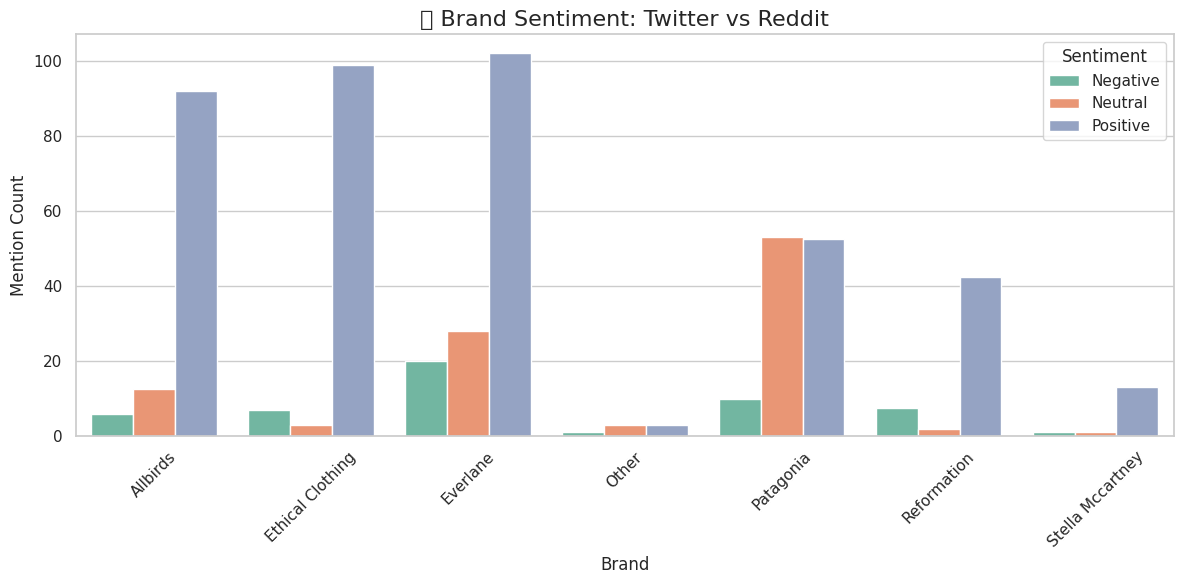

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


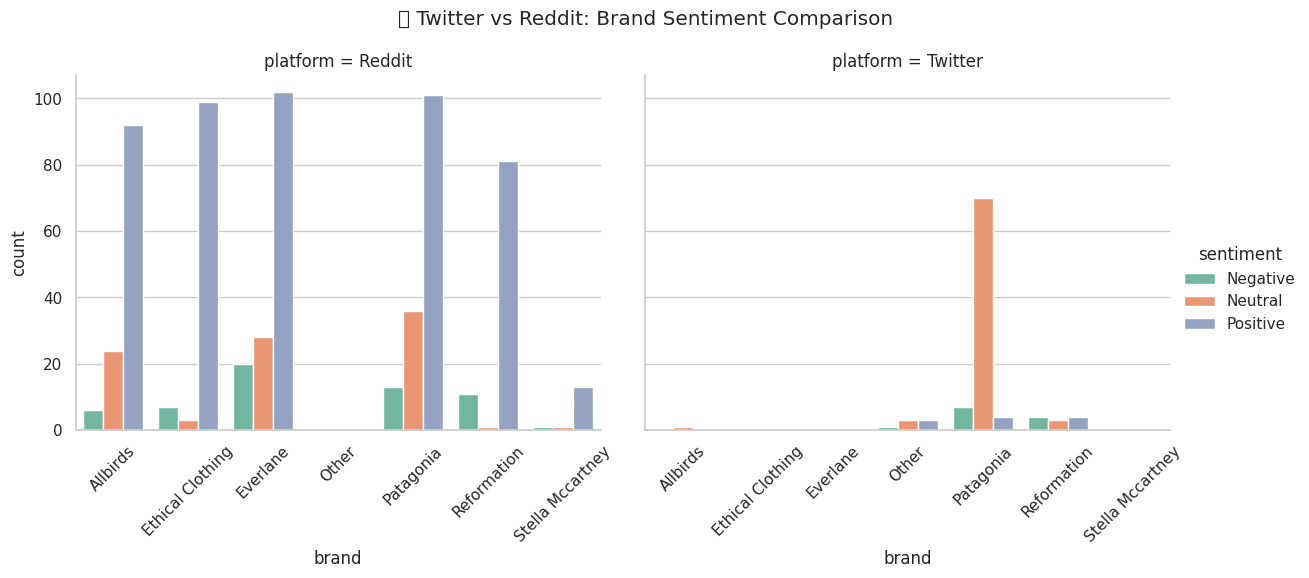

In [20]:
# Visualizing twitter vs Reddit
# Final Cleaned Data Recap
combined = pd.concat([
    df_twitter[['brand', 'sentiment', 'platform']],
    df_reddit[['brand', 'sentiment', 'platform']]
])
# Group & Visualize Sentiment by Brand & Platform

import matplotlib.pyplot as plt
import seaborn as sns

# Group data
grouped = combined.groupby(['brand', 'platform', 'sentiment']).size().reset_index(name='count')

# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x="brand",
    y="count",
    hue="sentiment",
    palette="Set2",
    ci=None,
    dodge=True
)

# Add platform separation using facet grid (optional)
plt.title("📊 Brand Sentiment: Twitter vs Reddit", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Mention Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
# Split by Platform Using FacetGrid
g = sns.catplot(
    data=grouped,
    x="brand",
    y="count",
    hue="sentiment",
    col="platform",
    kind="bar",
    palette="Set2",
    height=5,
    aspect=1.2
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("🔍 Twitter vs Reddit: Brand Sentiment Comparison")
g.set_xticklabels(rotation=45)
plt.show()



